# **Ulangan Tengah Semester**

Klasifikasi K-Nearest Neighbor (K-NN)

In [51]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [53]:
# Import Dataset
link="https://raw.githubusercontent.com/bintangradityaputra/contoh/master/dataR2.csv"
data = pd.read_csv(link)

In [54]:
# Membaca Dataset
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [55]:
# Jumlah baris dan kolom pada dataset
print(len(data), len(data.columns))

116 10


In [56]:
# menemukan Missing Value
data.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [57]:
# melihat tipe data di setiap variabel
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


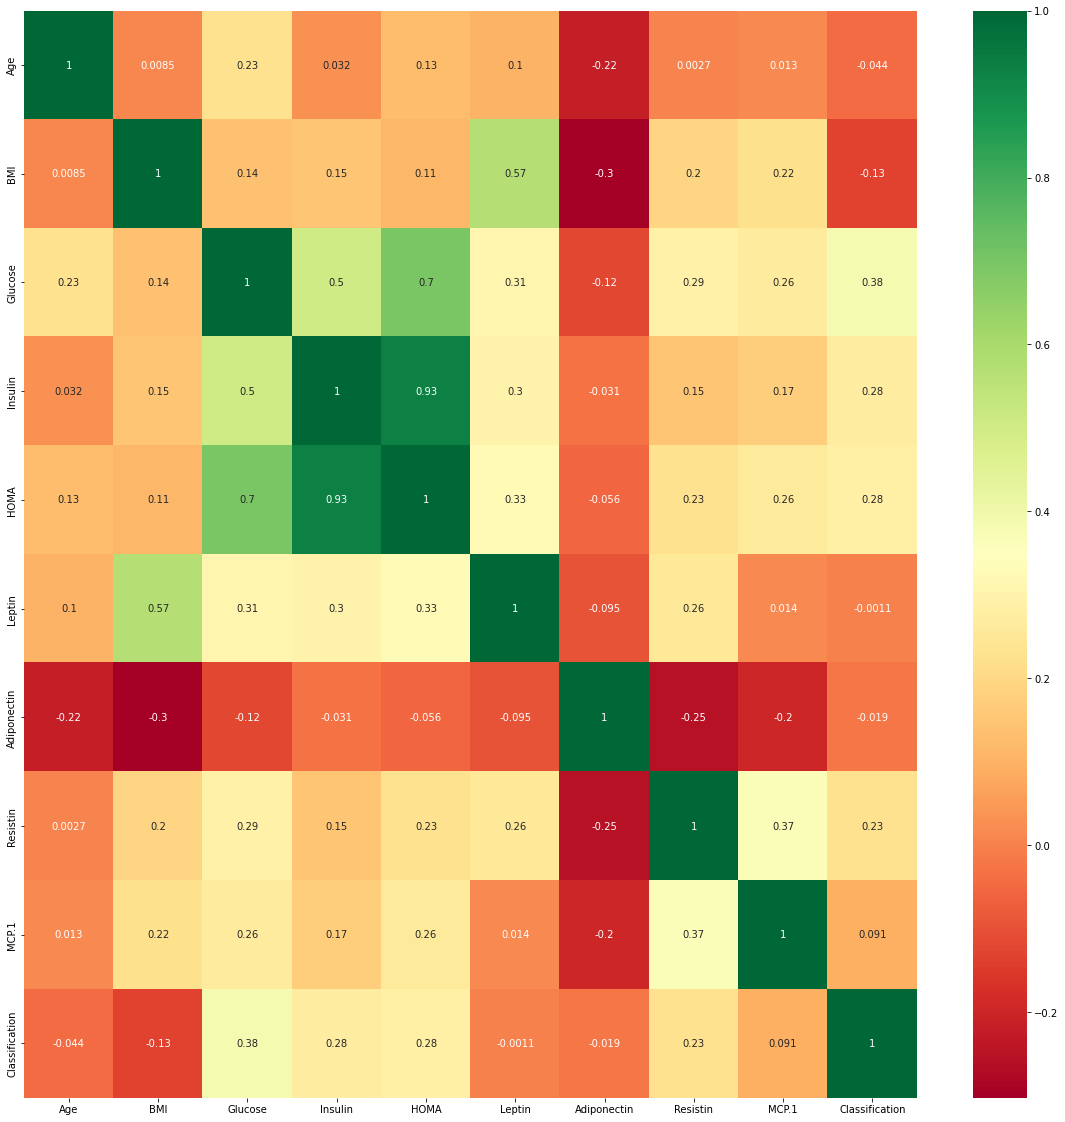

In [58]:
# Deklarasi heatmap untuk menemukan korelasi
plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), cmap = 'RdYlGn', annot = True)

In [59]:
# melihat value kolom
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


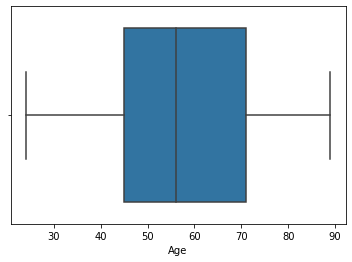

In [61]:
# tidak ada outliers untuk kolom Age
sns.boxplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


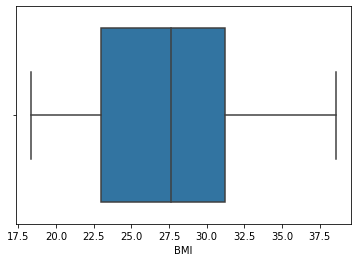

In [62]:
# tidak ada outliers untuk kolom BMI
sns.boxplot(data['BMI'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


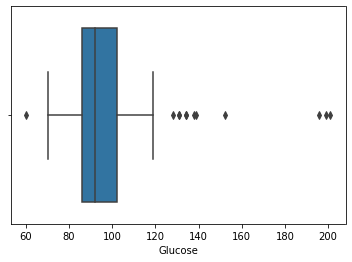

In [63]:
# bebrapa outliers untuk kolom Glucose
sns.boxplot(data['Glucose'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


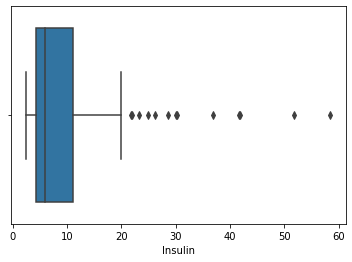

In [64]:
# Outliers untuk kolom Insulin
sns.boxplot(data['Insulin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


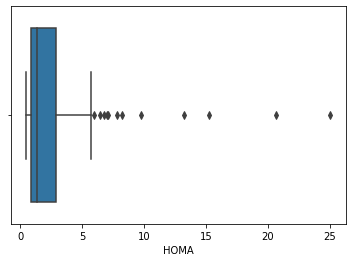

In [65]:
# terdapat banyak outliers untuk kolom HOMA
sns.boxplot(data['HOMA'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


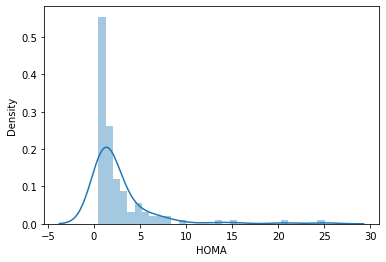

In [60]:
# Distribution plot untuk kolom HOMA
sns.distplot(data['HOMA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


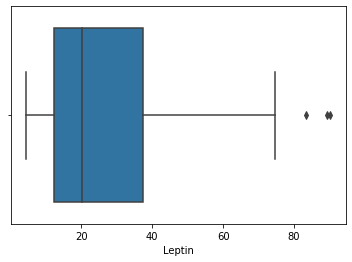

In [66]:
# Outliers untuk kolom Leptin
sns.boxplot(data["Leptin"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


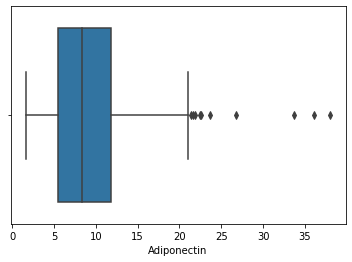

In [67]:
# Outliers untuk kolom Adiponectin
sns.boxplot(data['Adiponectin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


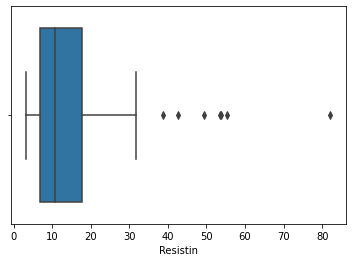

In [68]:
# Outliers untuk kolom Resistin
sns.boxplot(data['Resistin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


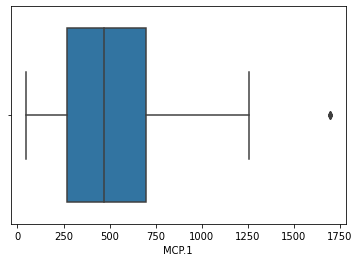

In [69]:
# Outliers untuk kolom MCP.1
sns.boxplot(data['MCP.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


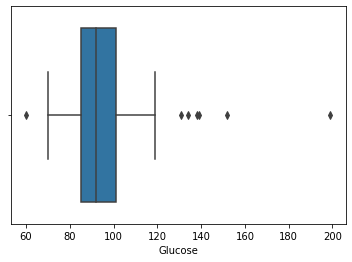

In [25]:
cancer=data.copy()

insulinQ1=cancer['Insulin'].quantile(0.25)
insulinQ3=cancer['Insulin'].quantile(0.75)
insulinIQR=insulinQ3-insulinQ1
lowerliminsulin=insulinQ1-1.5*insulinIQR
upperliminsulin=insulinQ3+1.5*insulinIQR
insulrem=cancer[(cancer['Insulin']>lowerliminsulin)&(upperliminsulin > cancer['Insulin'])]
 
sns.boxplot(insulrem['Glucose'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


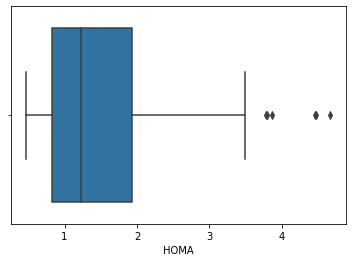

In [26]:
glucoseQ1=insulrem['Glucose'].quantile(0.25)
glucoseQ3=insulrem['Glucose'].quantile(0.75)
glucoseIQR=glucoseQ3-glucoseQ1
upperlimglucose=glucoseQ3+1.5*glucoseIQR
lowerlimglucose=glucoseQ1-1.5*glucoseIQR
glucoserem=insulrem[(insulrem['Glucose'] > lowerlimglucose)&(upperlimglucose > insulrem['Glucose'])]
   
sns.boxplot(glucoserem['HOMA'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


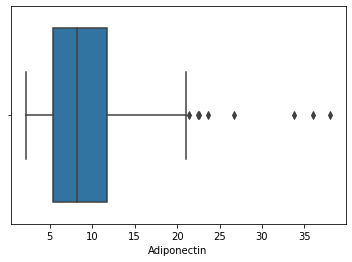

In [27]:
homaQ1=glucoserem['HOMA'].quantile(0.25)
homaQ3=glucoserem['HOMA'].quantile(0.75)
homaIQR=homaQ3-homaQ1
upperlimhoma=homaQ3+1.5*homaIQR
lowerlimhoma=homaQ1-1.5*homaIQR
homarem=glucoserem[(glucoserem['HOMA'] > lowerlimhoma)&(upperlimhoma > glucoserem['HOMA'])]
     
sns.boxplot(homarem['Adiponectin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


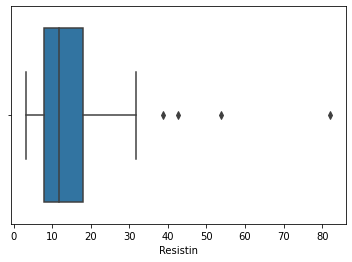

In [28]:
AdiponectinQ1=homarem['Adiponectin'].quantile(0.25)
AdiponectinQ3=homarem['Adiponectin'].quantile(0.75)
AdiponectinIQR=AdiponectinQ3-AdiponectinQ1
upperlimAdiponectin=AdiponectinQ3+1.5*AdiponectinIQR
lowerlimAdiponectin=AdiponectinQ1-1.5*AdiponectinIQR
adirem=homarem[(homarem['Adiponectin'] > lowerlimAdiponectin)&(upperlimAdiponectin > homarem['Adiponectin'])]

sns.boxplot(adirem['Resistin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


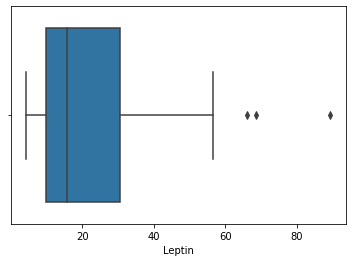

In [29]:
resistinQ1=adirem['Resistin'].quantile(0.25)
resistinQ3=adirem['Resistin'].quantile(0.75)
resistinIQR=resistinQ3-resistinQ1
lowerlimresistin=resistinQ1-1.5*resistinIQR
upperlimresistin=resistinQ3+1.5*resistinIQR
Resistinrem=adirem[(adirem['Resistin'] > lowerlimresistin)&(upperlimresistin > adirem['Resistin'])]
    
sns.boxplot(Resistinrem['Leptin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


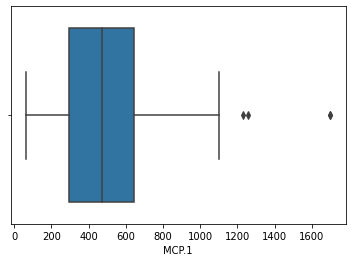

In [30]:
LeptinQ1=Resistinrem['Leptin'].quantile(0.25)
LeptinQ3=Resistinrem['Leptin'].quantile(0.75)
LeptinIQR=LeptinQ3-LeptinQ1
lowerlimLeptin=LeptinQ1-1.5*LeptinIQR
upperlimLeptin=LeptinQ3+1.5*LeptinIQR
leptinrem=Resistinrem[(Resistinrem['Leptin'] > lowerlimLeptin)&(upperlimLeptin > Resistinrem['Leptin'])]
 
sns.boxplot(leptinrem['MCP.1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


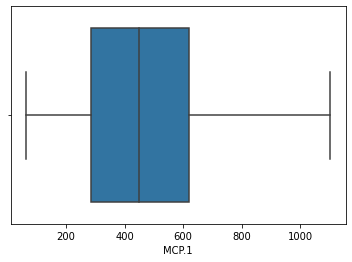

In [32]:
MCPQ1=leptinrem['MCP.1'].quantile(0.25)
MCPQ3=leptinrem['MCP.1'].quantile(0.75)
MCPIQR=MCPQ3-MCPQ1
lowerlimMCP=MCPQ1-1.5*MCPIQR
upperlimMCP=MCPQ3+1.5*MCPIQR
mcprem=leptinrem[(leptinrem['MCP.1'] > lowerlimMCP)&(upperlimMCP > leptinrem['MCP.1'])]
mcprem.shape
 
sns.boxplot(mcprem['MCP.1'])

In [33]:
# membuat fitur dari data
X = mcprem.iloc[:, 0:9]
#membuat target variabel dari data
Y = mcprem.iloc[:, 9]

In [35]:
from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X)

In [36]:
# Splitting dataset untuk uji dan data latih
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)

In [38]:
# Import KNeighbors Classifier dari sklearn
# menemukan akurasi pada data latih dan data uji menggunakan Euclidean Distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for x in range(5,10,2):
    knn=KNeighborsClassifier(n_neighbors=x,metric='minkowski',weights='distance')
    knn.fit(xtrain,ytrain)
    train_ypred=knn.predict(xtrain)
    acc_train_score=accuracy_score(train_ypred,ytrain)
    test_ypred=knn.predict(xtest)
    acc_test_score=accuracy_score(test_ypred,ytest)
    print(f'Nilai Akurasi untuk  data latih dan data uji adalah : {acc_train_score} and {acc_test_score} respectively for {x} neighbours')

Nilai Akurasi untuk  data latih dan data uji adalah : 1.0 and 0.6363636363636364 respectively for 5 neighbours
Nilai Akurasi untuk  data latih dan data uji adalah : 1.0 and 0.6363636363636364 respectively for 7 neighbours
Nilai Akurasi untuk  data latih dan data uji adalah : 1.0 and 0.7272727272727273 respectively for 9 neighbours


In [39]:
knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',weights='distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [41]:
trainypred=knn.predict(xtrain)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(trainypred,ytrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        22

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



In [46]:
# Akurasi Score untuk data latih
accuracy_score(trainypred,ytrain)

1.0

In [47]:
testypredicted=knn.predict(xtest)

In [48]:
# Akurasi Score untuk data Uji
from sklearn.metrics import accuracy_score
accuracy_score(testypredicted,ytest)

0.6363636363636364

In [49]:
import pickle
#Save our model as a pickle to a file
pickle.dump(knn, open("my_knn_model.pickle.dat", "wb"))

# delete the existing knn model from the environment
del knn

#Load the pickled object from the file
load_knn=pickle.load(open("my_knn_model.pickle.dat", "rb"))

# Use the loaded model to make predictions
load_knn.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1])

# **Classification Using Decision Tree**

In [73]:
from sklearn import tree
from matplotlib import pyplot as plt
# membuat klasifikasi untuk decisionn tree
clf_tree = tree.DecisionTreeClassifier(criterion = "entropy")
clf_tree = clf_tree.fit(xtrain, ytrain)

In [75]:
# melihat klasifikasi dari dataset
data.Classification.value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [79]:
# Variable Independent
X = data.drop(['Classification'], axis = 1)
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [80]:
# variable dependent
y = data["Classification"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

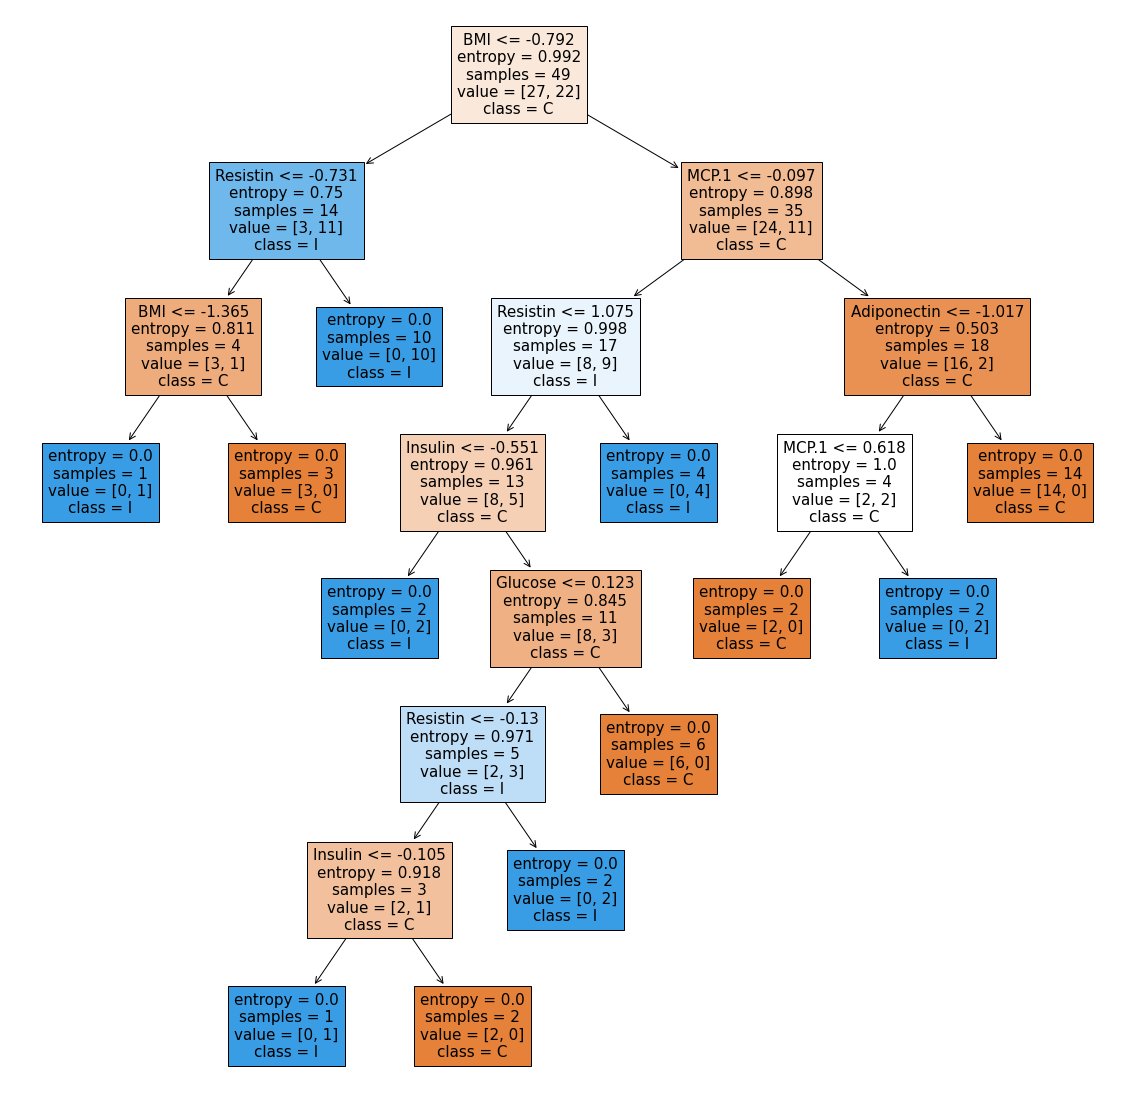

In [84]:
# Desain untuk Decision Tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf_tree, feature_names=list(data.columns.values)[:9], class_names=list(data.columns.values)[9] ,filled=True)

In [86]:
# Menghitung akurasi model untuk data latih dan data uji
print("Score data train :", clf_tree.score(xtrain, ytrain))
print("Score data test  :", clf_tree.score(xtest, ytest))

Score data train : 1.0
Score data test  : 0.36363636363636365
